In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Train.csv')

In [52]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [53]:
missing_values = df.isnull().sum()

In [54]:
df.isnull().sum().sum()

np.int64(3873)

In [55]:
print(df['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [56]:
import seaborn as sns

In [57]:
item_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
print("\nSales by Item Type:\n", item_sales)


Sales by Item Type:
 Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64


In [101]:
categorical_cols = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 
                    'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn '{col}':")
    print("Number of unique values:", df[col].nunique())
    print("Unique values:", df[col].unique())


Unique Values in Categorical Columns:

Column 'Item_Identifier':
Number of unique values: 1559
Unique values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Column 'Item_Type':
Number of unique values: 16
Unique values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Column 'Outlet_Identifier':
Number of unique values: 10
Unique values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Column 'Item_Fat_Content':
Number of unique values: 5
Unique values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Column 'Outlet_Size':
Number of unique values: 3
Unique values: ['Medium' nan 'High' 'Small']

Column 'Outlet_Location_Type':
Number of unique values: 3
Unique values: ['Tier 1' 'Tier 3' 'Tier 2']

Column 'Outlet_Type':
Number of unique values: 4
Unique values: ['Supermarket Ty

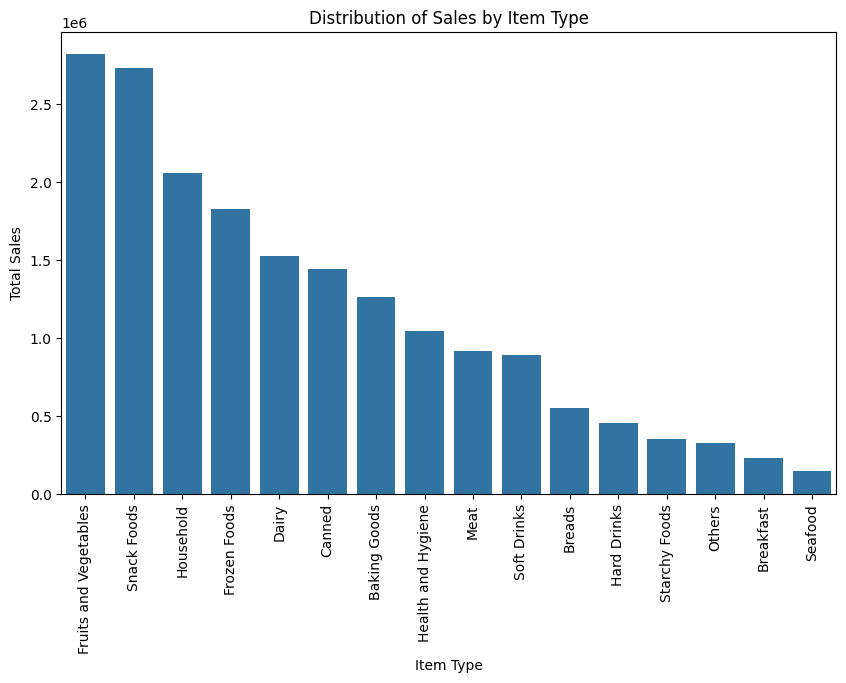

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

In [59]:
top_item_type = item_sales.idxmax()
print(f"Observation: The item type '{top_item_type}' generates the highest sales.")

Observation: The item type 'Fruits and Vegetables' generates the highest sales.


In [60]:
yearly_sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_values()
print("\nAverage Sales by Outlet Establishment Year:\n", yearly_sales)


Average Sales by Outlet Establishment Year:
 Outlet_Establishment_Year
1998     339.351662
2009    1995.498739
2002    2192.384798
1997    2277.844267
1987    2298.995256
2007    2340.675263
1999    2348.354635
2004    2438.841866
1985    2483.677474
Name: Item_Outlet_Sales, dtype: float64


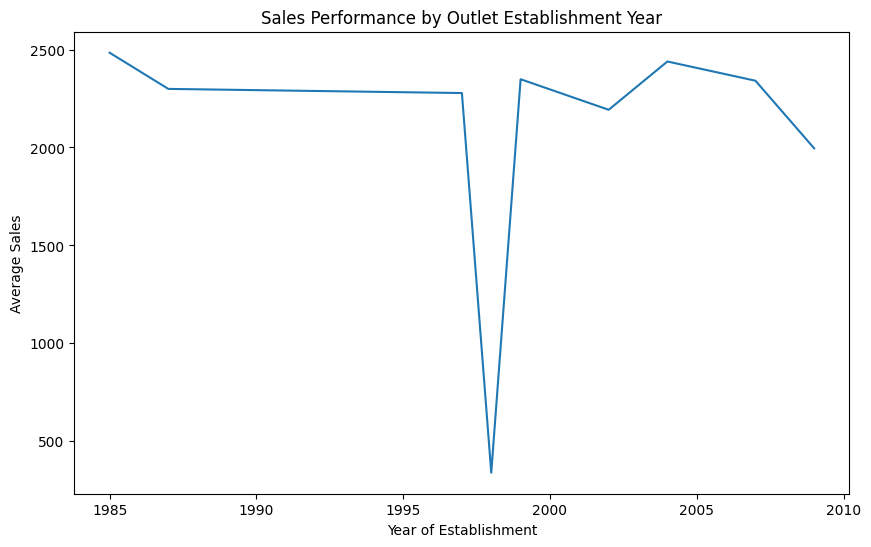

In [61]:
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Sales Performance by Outlet Establishment Year')
plt.xlabel('Year of Establishment')
plt.ylabel('Average Sales')
plt.show()


In [62]:
best_year = yearly_sales.idxmax()
print(f"Observation: Outlets established in the year '{best_year}' have the highest average sales.")

Observation: Outlets established in the year '1985' have the highest average sales.


In [63]:
outlet_sales_stats = df.groupby('Outlet_Type')['Item_Outlet_Sales'].describe()
print("\nSales Statistics by Outlet Type:\n", outlet_sales_stats)


Sales Statistics by Outlet Type:
                     count         mean          std       min         25%  \
Outlet_Type                                                                 
Grocery Store      1083.0   339.828500   260.851582   33.2900   153.79980   
Supermarket Type1  5577.0  2316.181148  1515.965558   73.2380  1151.16820   
Supermarket Type2   928.0  1995.498739  1375.932889   69.2432   981.55565   
Supermarket Type3   935.0  3694.038558  2127.760054  241.6854  2044.33890   

                         50%         75%         max  
Outlet_Type                                           
Grocery Store       256.9988   458.73620   1775.6886  
Supermarket Type1  1990.7420  3135.91800  10256.6490  
Supermarket Type2  1655.1788  2702.64865   6768.5228  
Supermarket Type3  3364.9532  4975.52340  13086.9648  


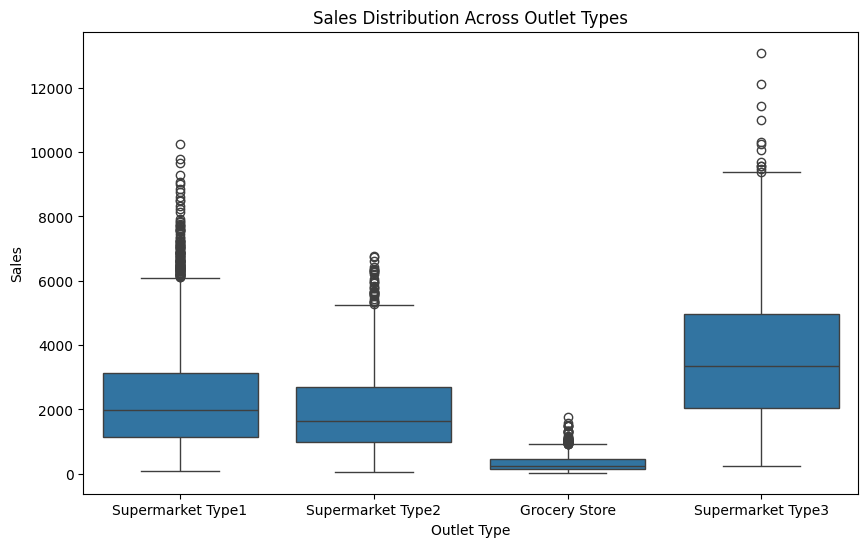

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution Across Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.show()

In [65]:
most_sales_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().idxmax()
print(f"Observation: '{most_sales_outlet_type}' outlets tend to have the highest average sales.")

Observation: 'Supermarket Type3' outlets tend to have the highest average sales.


In [66]:
size_sales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
print("\nAverage Sales by Outlet Size:\n", size_sales)


Average Sales by Outlet Size:
 Outlet_Size
Medium    2681.603542
High      2298.995256
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64


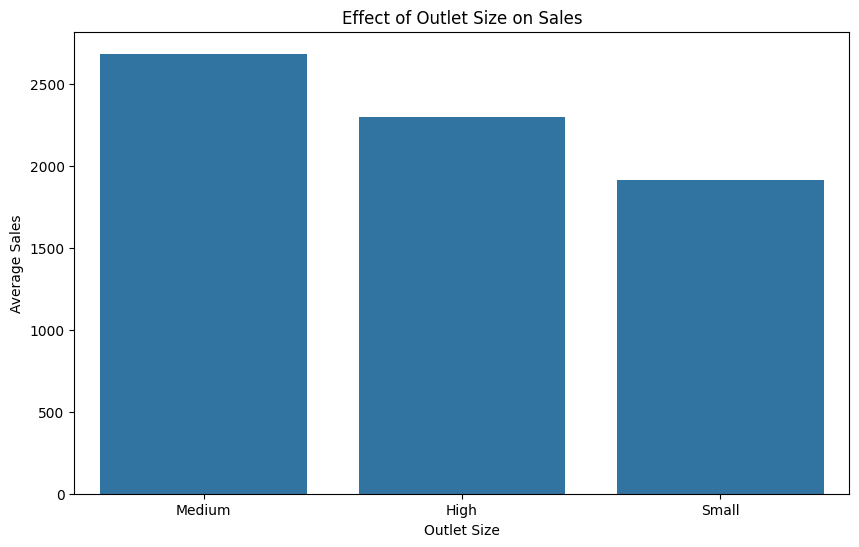

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x=size_sales.index, y=size_sales.values)
plt.title('Effect of Outlet Size on Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.show()

In [68]:
top_outlet_size = size_sales.idxmax()
print(f"Observation: Large outlets generate the highest average sales, with '{top_outlet_size}' size outlets performing best.")

Observation: Large outlets generate the highest average sales, with 'Medium' size outlets performing best.


In [69]:
print("\nTask 5: Relationship Between Item MRP and Sales")


Task 5: Relationship Between Item MRP and Sales


In [70]:
correlation = df['Item_MRP'].corr(df['Item_Outlet_Sales'])
print(f"Correlation between Item MRP and Sales: {correlation:.2f}")

Correlation between Item MRP and Sales: 0.57


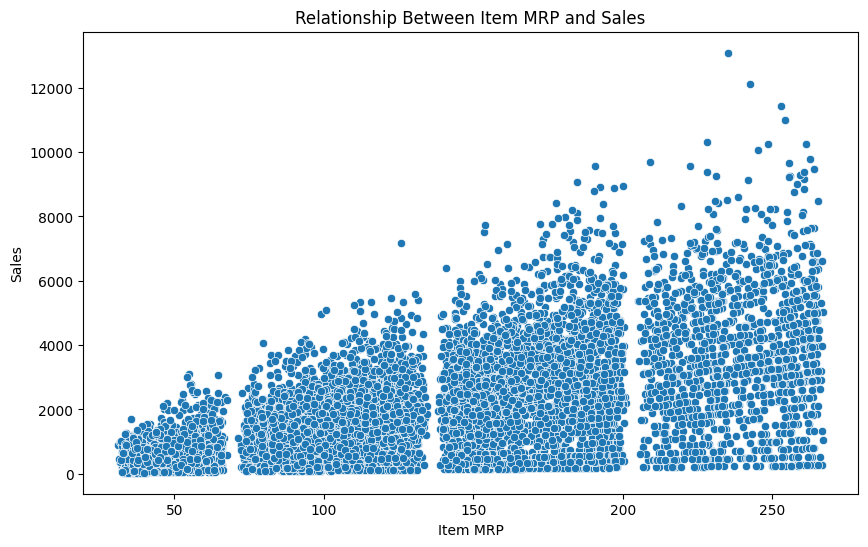

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Relationship Between Item MRP and Sales')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.show()


In [72]:
if correlation > 0:
    print(f"Observation: There is a positive correlation between Item MRP and Sales (Correlation = {correlation:.2f}). Higher priced items tend to generate more sales.")
else:
    print(f"Observation: There is a weak or negative correlation (Correlation = {correlation:.2f}), meaning MRP has little or no effect on sales.")

Observation: There is a positive correlation between Item MRP and Sales (Correlation = 0.57). Higher priced items tend to generate more sales.


In [73]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer 

In [ ]:
df = pd.read_csv('Train.csv')

In [100]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [101]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [102]:
print(df.shape)

(8523, 12)


In [103]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [104]:
non_zero_mean = df.loc[df['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [105]:
if not df['Item_Weight'].isna().all():
    df.fillna({'Item_Weight': df['Item_Weight'].median()}, inplace=True)
else:
    print("No non-null values to calculate median.")


In [106]:
if not df['Outlet_Size'].isna().all():
    df.fillna({'Outlet_Size': df['Outlet_Size'].mode()[0]}, inplace=True)
else:
    print("No non-null values to calculate mode.")


In [107]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [110]:
df.to_csv('processed_train.csv', index=False)

In [111]:
p_df = pd.read_csv("processed_train.csv")
p_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


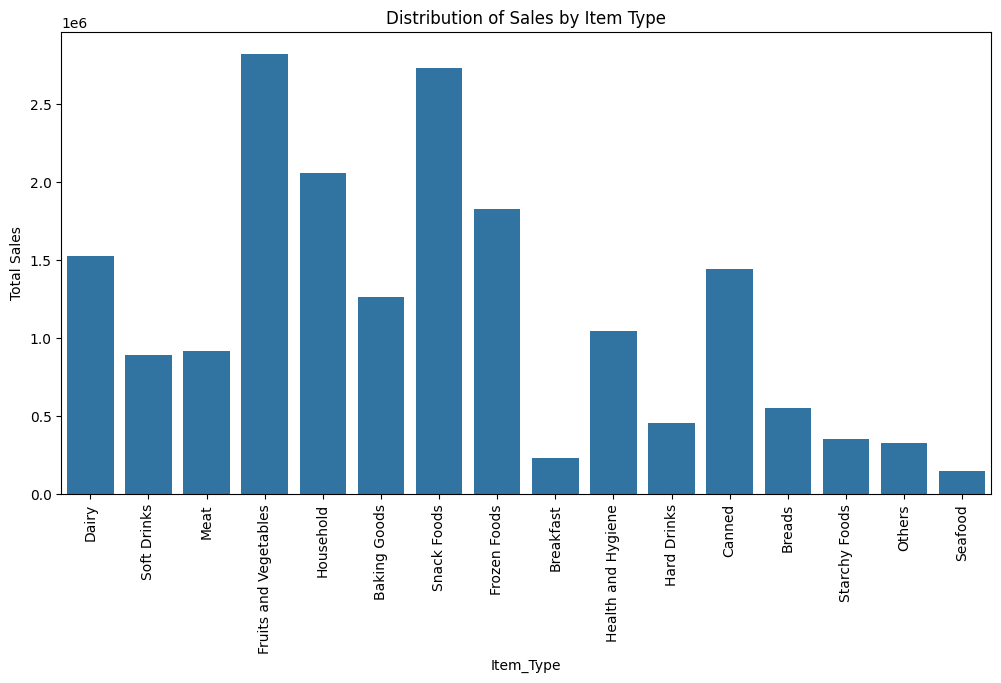

In [131]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=p_df, estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.ylabel('Item Type')
plt.ylabel('Total Sales')
plt.show()


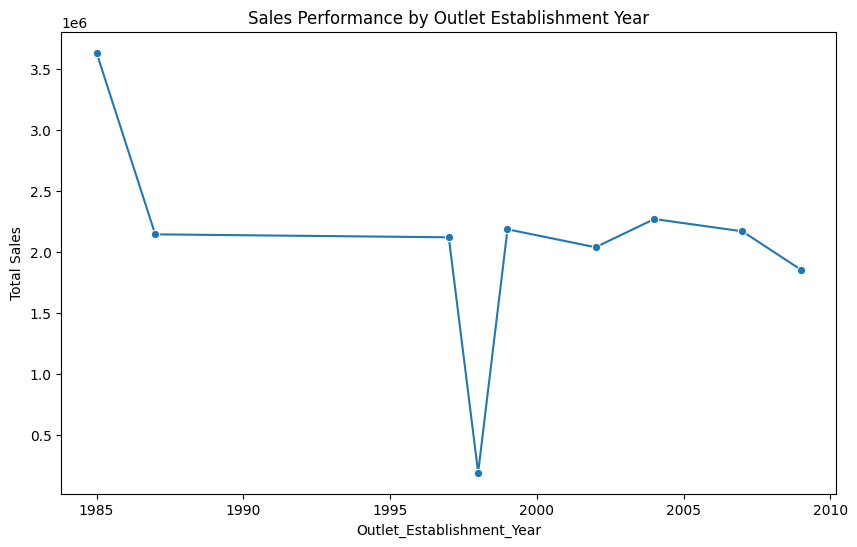

In [133]:
p_df_year_sales = p_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=p_df_year_sales, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()


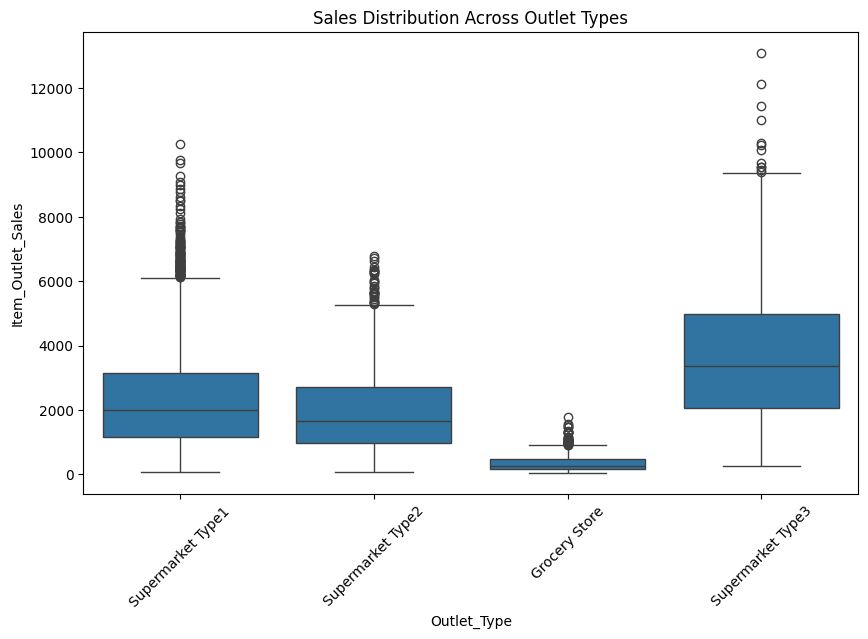

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df)
plt.title('Sales Distribution Across Outlet Types')
plt.xticks(rotation=45)
plt.show()


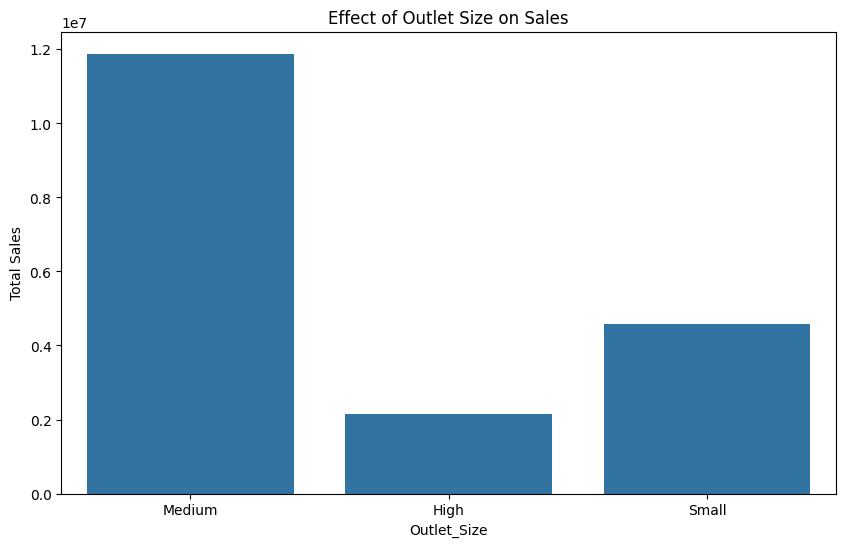

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=p_df, estimator=sum, errorbar=None)
plt.title('Effect of Outlet Size on Sales')
plt.ylabel('Total Sales')
plt.show()



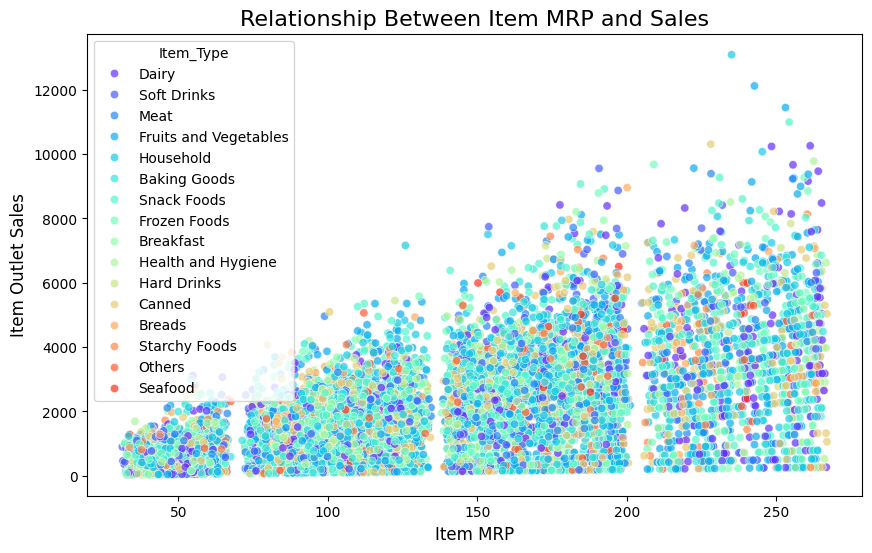

In [141]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_df, hue='Item_Type', palette="rainbow", alpha=0.7)
plt.title('Relationship Between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

<Figure size 1500x1000 with 0 Axes>

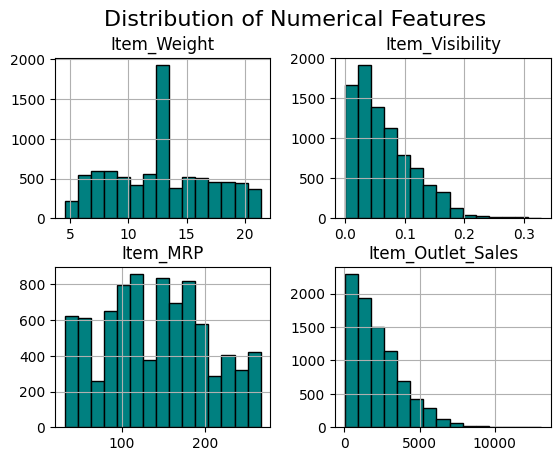

In [143]:
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


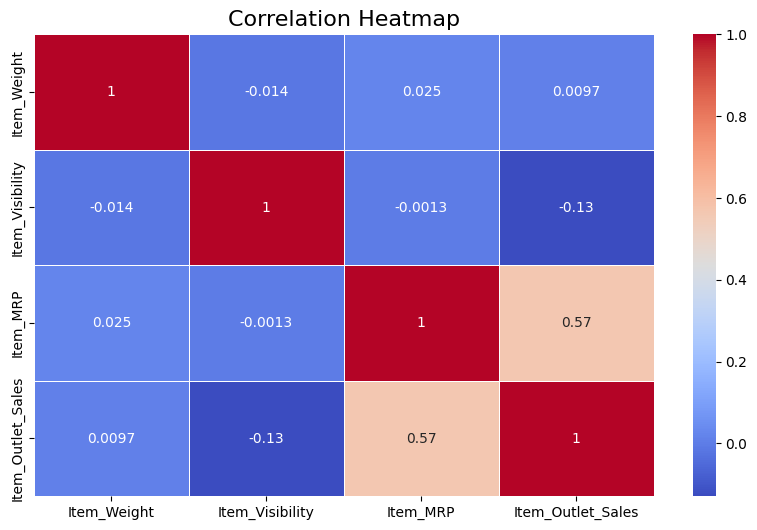

In [145]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

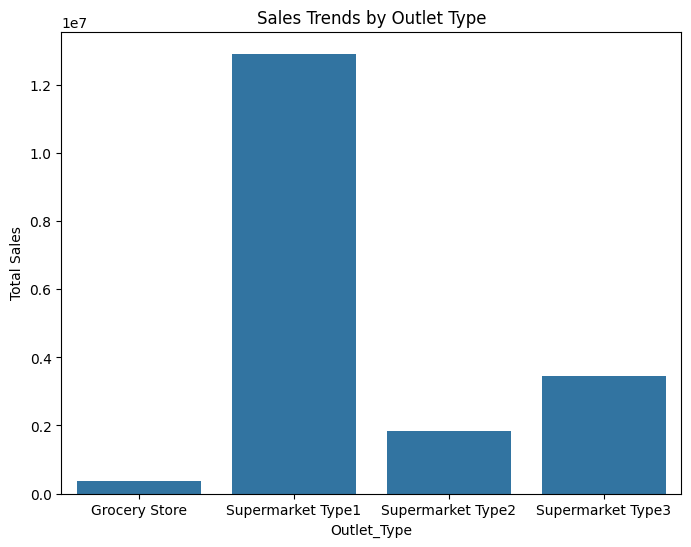

In [147]:
p_df_outlet_sales = p_df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df_outlet_sales)
plt.title('Sales Trends by Outlet Type')
plt.ylabel('Total Sales')
plt.show()


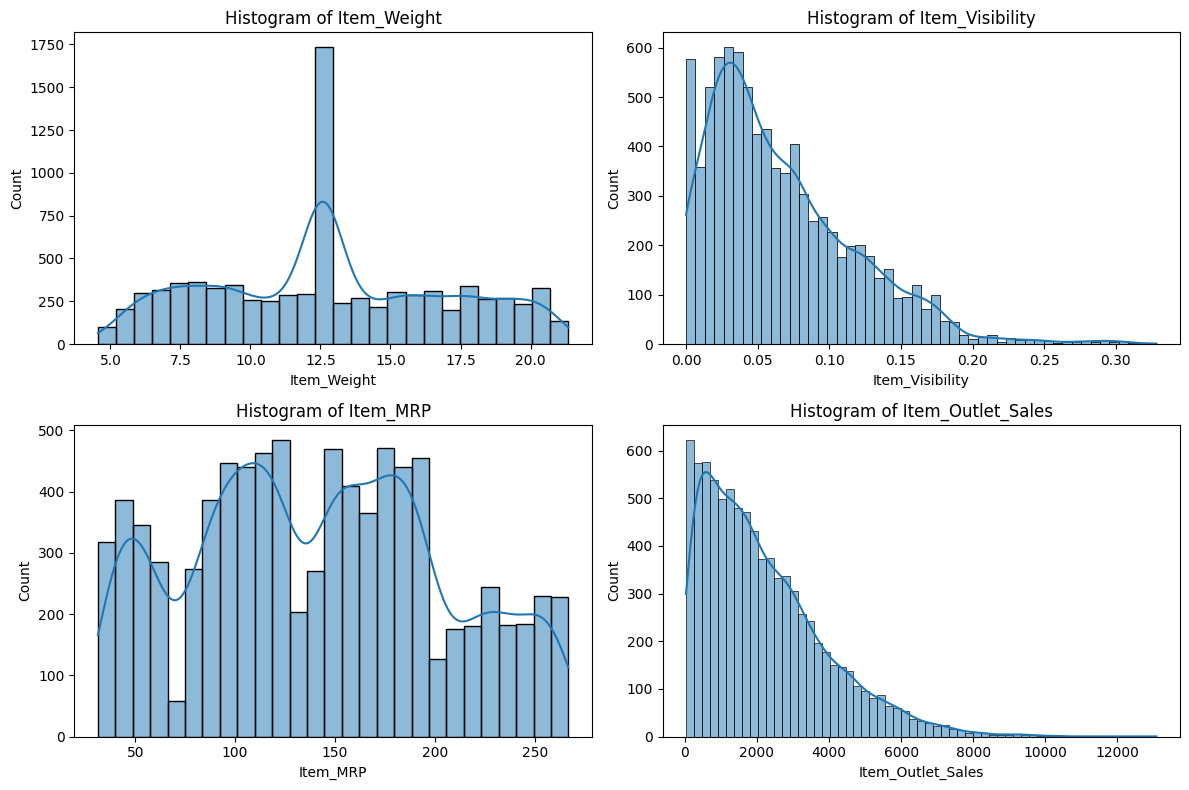

In [149]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(p_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


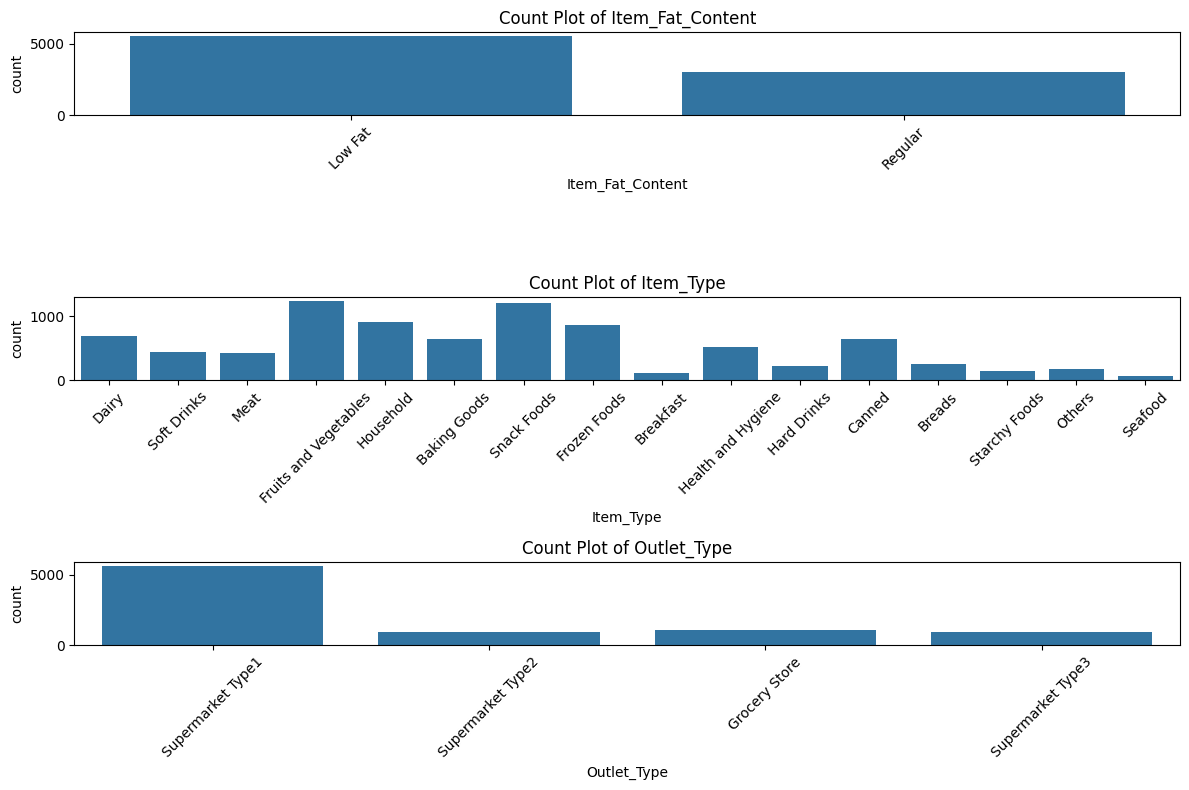

In [151]:
# Categorical features to analyz
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type']

# Setting up the figure size for better visibility of plots
plt.figure(figsize=(12, 8))  # Increase height for better spacing

# Loop through each categorical feature to create count plots
for idx, feature in enumerate(categorical_features):
    # Creating a subplot for each feature (2 rows, 2 columns)
    plt.subplot(3, 1, idx + 1)  # Changed to 3 rows and 1 column for vertical stacking
    # Generating count plot for the current feature
    sns.countplot(x=p_df[feature])
    plt.title(f'Count Plot of {feature}')  # Title for each plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjusting layout to prevent overlap of plots
plt.tight_layout()  # This ensures that subplots are spaced properly
plt.show()  # Display all the plots

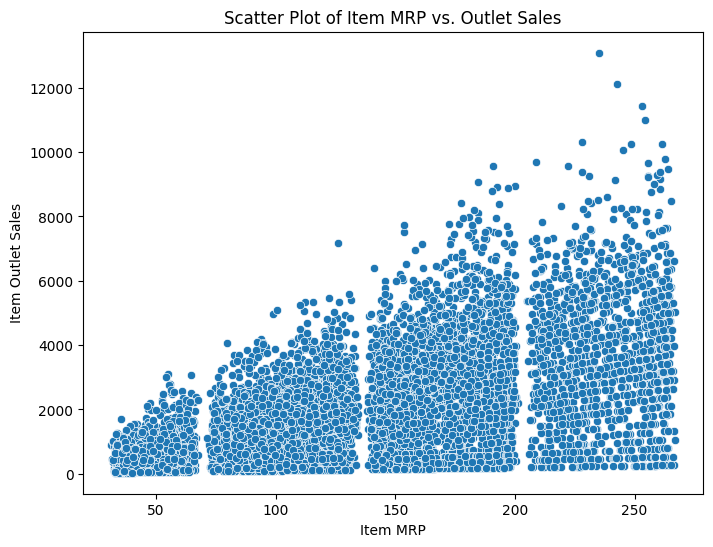

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_df)
plt.title('Scatter Plot of Item MRP vs. Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()


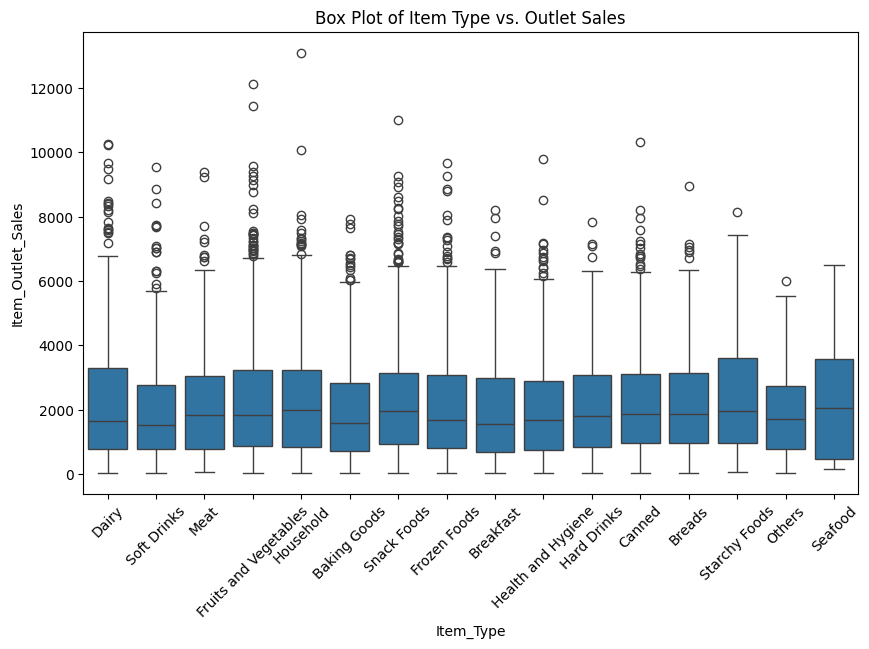

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=p_df)
plt.title('Box Plot of Item Type vs. Outlet Sales')
plt.xticks(rotation=45)
plt.show()


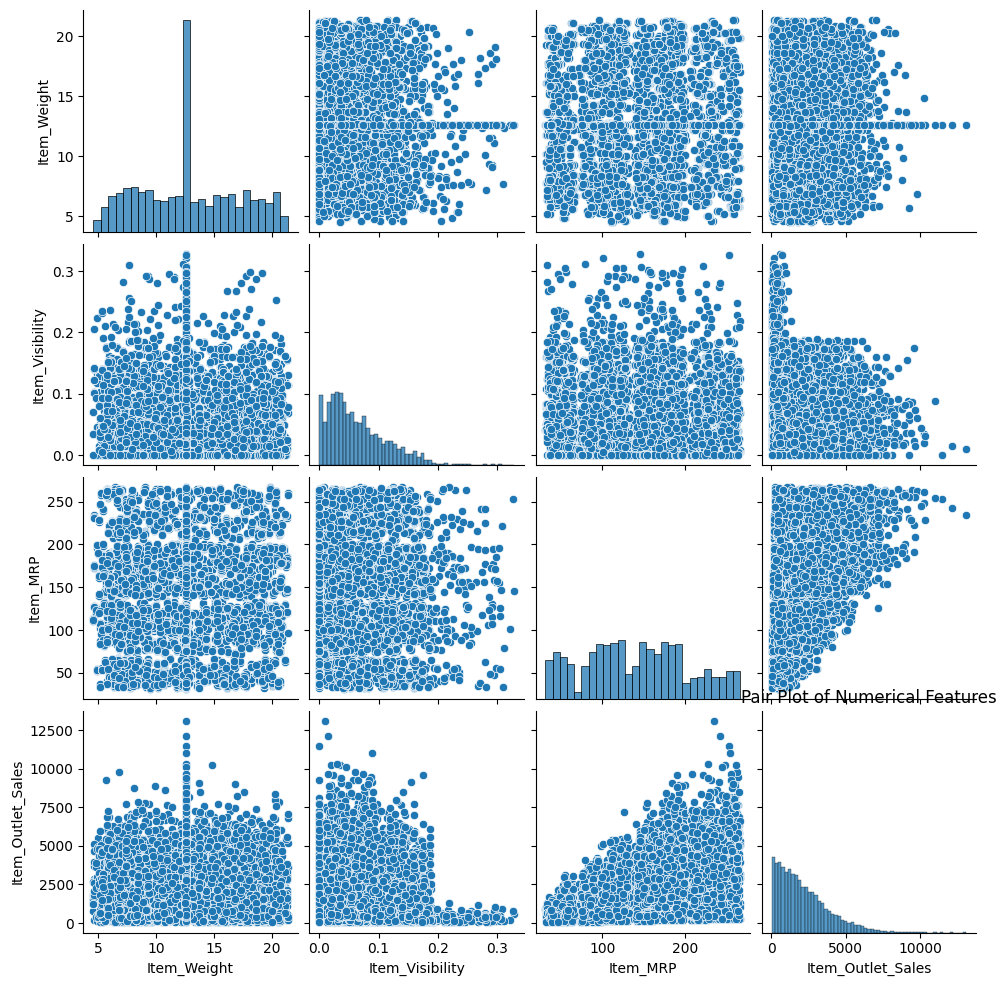

In [157]:
sns.pairplot(p_df[numerical_features])
plt.title('Pair Plot of Numerical Features')
plt.show()


In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from scipy import stats

In [8]:
data = pd.read_csv("processed_train.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

In [11]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [13]:
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

In [14]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

In [15]:
rows, columns = data.shape

print("Total no of rows:", rows)
print("Total no of columns:", columns)

Total no of rows: 8523
Total no of columns: 11


In [16]:
nominal_columns = ['Item_Fat_Content', 'Item_Type',
                   'Outlet_Location_Type', 'Outlet_Type'] 

ordinal_columns = ['Outlet_Size']  

numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                    'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Age']  

print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Age']


In [17]:
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [18]:
ohe = OneHotEncoder(sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [19]:
ct = make_column_transformer(
    (ohe, ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']),  # Nominal columns
    (ode, ['Outlet_Size']),  # Ordinal column
    (scaler, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
              'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age']),  # Numeric columns
    remainder='passthrough'
)

ct.set_output(transform= 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('standardscaler', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year',
                                  'Item_Outlet_Sales', 'Outlet_Age'])])

In [20]:
df_encoded = ct.fit_transform(data)
df_encoded

,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Item_Type_Baking Goods,onehotencoder__Item_Type_Breads,onehotencoder__Item_Type_Breakfast,onehotencoder__Item_Type_Canned,onehotencoder__Item_Type_Dairy,onehotencoder__Item_Type_Frozen Foods,onehotencoder__Item_Type_Fruits and Vegetables,onehotencoder__Item_Type_Hard Drinks,...,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,ordinalencoder__Outlet_Size,standardscaler__Item_Weight,standardscaler__Item_Visibility,standardscaler__Item_MRP,standardscaler__Outlet_Establishment_Year,standardscaler__Item_Outlet_Sales,standardscaler__Outlet_Age
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.831187,-0.970732,1.747454,0.139541,0.910601,-0.139541
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-1.630810,-0.908111,-1.489023,1.334103,-1.018440,-1.334103
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.108727,-0.956917,0.010040,0.139541,-0.049238,-0.139541
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.510904,-1.281758,0.660050,0.020085,-0.849103,-0.020085
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,-1.407246,-0.181193,1.180783,-1.293934,0.349915,1.293934
8519,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-1.048835,-0.371154,-0.527301,0.497909,-0.956402,-0.497909
8520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.523639,-0.599784,-0.897208,0.736822,-0.579100,-0.736822
8521,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-1.325628,1.532880,-0.607977,1.334103,-0.196725,-1.334103


In [21]:
rows, columns = df_encoded.shape
print("Total number of rows after encoding:", rows)
print("Total number of columns after encoding:", columns)

Total number of rows after encoding: 8523
Total number of columns after encoding: 32


In [22]:
pd.set_option('display.max_columns', None)
print("Encoded Columns:\n", df_encoded.columns.tolist())

Encoded Columns:
 ['onehotencoder__Item_Fat_Content_Low Fat', 'onehotencoder__Item_Fat_Content_Regular', 'onehotencoder__Item_Type_Baking Goods', 'onehotencoder__Item_Type_Breads', 'onehotencoder__Item_Type_Breakfast', 'onehotencoder__Item_Type_Canned', 'onehotencoder__Item_Type_Dairy', 'onehotencoder__Item_Type_Frozen Foods', 'onehotencoder__Item_Type_Fruits and Vegetables', 'onehotencoder__Item_Type_Hard Drinks', 'onehotencoder__Item_Type_Health and Hygiene', 'onehotencoder__Item_Type_Household', 'onehotencoder__Item_Type_Meat', 'onehotencoder__Item_Type_Others', 'onehotencoder__Item_Type_Seafood', 'onehotencoder__Item_Type_Snack Foods', 'onehotencoder__Item_Type_Soft Drinks', 'onehotencoder__Item_Type_Starchy Foods', 'onehotencoder__Outlet_Location_Type_Tier 1', 'onehotencoder__Outlet_Location_Type_Tier 2', 'onehotencoder__Outlet_Location_Type_Tier 3', 'onehotencoder__Outlet_Type_Grocery Store', 'onehotencoder__Outlet_Type_Supermarket Type1', 'onehotencoder__Outlet_Type_Supermarket 

In [23]:
simplified_column_names = {
    'onehotencoder__Item_Fat_Content_Low Fat': 'Fat_Low',
    'onehotencoder__Item_Fat_Content_Regular': 'Fat_Regular',
    'onehotencoder__Item_Type_Baking Goods': 'Type_Baking',
    'onehotencoder__Item_Type_Breads': 'Type_Breads',
    'onehotencoder__Item_Type_Breakfast': 'Type_Breakfast',
    'onehotencoder__Item_Type_Canned': 'Type_Canned',
    'onehotencoder__Item_Type_Dairy': 'Type_Dairy',
    'onehotencoder__Item_Type_Frozen Foods': 'Type_Frozen',
    'onehotencoder__Item_Type_Fruits and Vegetables': 'Type_Fruits',
    'onehotencoder__Item_Type_Hard Drinks': 'Type_HardDrinks',
    'onehotencoder__Item_Type_Health and Hygiene': 'Type_Health_Hygiene',
    'onehotencoder__Item_Type_Household': 'Type_Household',
    'onehotencoder__Item_Type_Meat': 'Type_Meat',
    'onehotencoder__Item_Type_Others': 'Type_Others',
    'onehotencoder__Item_Type_Seafood': 'Type_Seafood',
    'onehotencoder__Item_Type_Snack Foods': 'Type_SnackFoods',
    'onehotencoder__Item_Type_Soft Drinks': 'Type_SoftDrinks',
    'onehotencoder__Item_Type_Starchy Foods': 'Type_StarchyFoods',
    'onehotencoder__Outlet_Location_Type_Tier 1': 'Location_Tier1',
    'onehotencoder__Outlet_Location_Type_Tier 2': 'Location_Tier2',
    'onehotencoder__Outlet_Location_Type_Tier 3': 'Location_Tier3',
    'onehotencoder__Outlet_Type_Grocery Store': 'Outlet_GroceryStore',
    'onehotencoder__Outlet_Type_Supermarket Type1': 'Outlet_Supermarket1',
    'onehotencoder__Outlet_Type_Supermarket Type2': 'Outlet_Supermarket2',
    'onehotencoder__Outlet_Type_Supermarket Type3': 'Outlet_Supermarket3',
    'ordinalencoder__Outlet_Size': 'Outlet_Size',
    'standardscaler__Item_Weight': 'Item_Weight',
    'standardscaler__Item_Visibility': 'Item_Visibility',
    'standardscaler__Item_MRP': 'Item_MRP',
    'standardscaler__Outlet_Establishment_Year': 'Outlet_Establishment_Year',
    'standardscaler__Item_Outlet_Sales': 'Item_Outlet_Sales',
    'standardscaler__Outlet_Age': 'Outlet_Age'
}

df_encoded.rename(columns=simplified_column_names, inplace=True)

Item_Weight: 0 outliers detected.
Item_Visibility: 146 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 197 outliers detected.


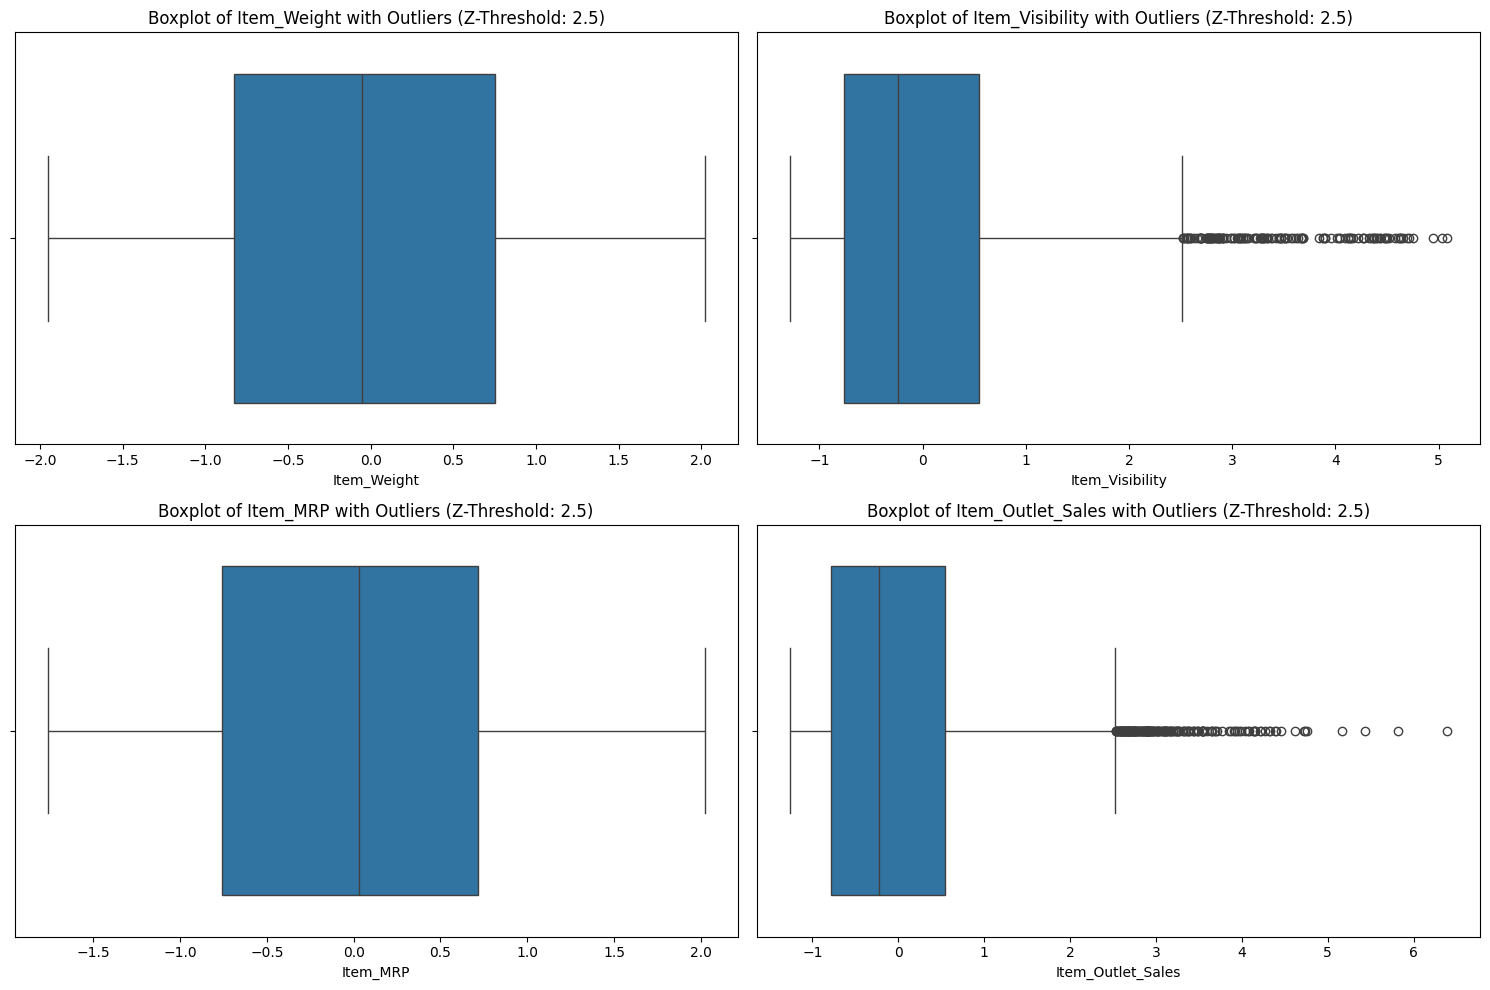

In [24]:
# Continuous numerical features for outlier detection
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Defining Z-score threshold for outlier detection
z_threshold = 2.5  # as 3 results with 0 outliers & 2 with many so fixed T as 2.5 

# Dictionary to store detected outliers
outliers_dict = {}

# Calculating Z-scores and identifing the outliers
for col in continuous_columns:
    df_encoded[col + '_zscore'] = np.abs((df_encoded[col] - df_encoded[col].mean()) / df_encoded[col].std())  # Calculating Z-score with its formula
    outliers_dict[col] = df_encoded[df_encoded[col + '_zscore'] > z_threshold]  # Storing outliers
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")


plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  # Creating a 2x2 grid of plots
    sns.boxplot(x=df_encoded[col])  # Boxplot for the column
    plt.title(f'Boxplot of {col} with Outliers (Z-Threshold: {z_threshold})')  
plt.tight_layout()
plt.show()

In [25]:
z_threshold = 2.5
outliers_removed = df_encoded[df_encoded['Item_Outlet_Sales_zscore'] <= z_threshold]

print(f"Original dataset size: {df_encoded.shape}")
print(f"Dataset size after removing outliers: {outliers_removed.shape}")

Original dataset size: (8523, 36)
Dataset size after removing outliers: (8326, 36)


In [26]:
outliers_removed.isnull().sum()

Fat_Low                      0
Fat_Regular                  0
Type_Baking                  0
Type_Breads                  0
Type_Breakfast               0
Type_Canned                  0
Type_Dairy                   0
Type_Frozen                  0
Type_Fruits                  0
Type_HardDrinks              0
Type_Health_Hygiene          0
Type_Household               0
Type_Meat                    0
Type_Others                  0
Type_Seafood                 0
Type_SnackFoods              0
Type_SoftDrinks              0
Type_StarchyFoods            0
Location_Tier1               0
Location_Tier2               0
Location_Tier3               0
Outlet_GroceryStore          0
Outlet_Supermarket1          0
Outlet_Supermarket2          0
Outlet_Supermarket3          0
Outlet_Size                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Outlet_Age                   0
Item_Wei

In [27]:
pd.set_option('display.max_columns', None)

# Display all column names
print(outliers_removed.columns.tolist())

['Fat_Low', 'Fat_Regular', 'Type_Baking', 'Type_Breads', 'Type_Breakfast', 'Type_Canned', 'Type_Dairy', 'Type_Frozen', 'Type_Fruits', 'Type_HardDrinks', 'Type_Health_Hygiene', 'Type_Household', 'Type_Meat', 'Type_Others', 'Type_Seafood', 'Type_SnackFoods', 'Type_SoftDrinks', 'Type_StarchyFoods', 'Location_Tier1', 'Location_Tier2', 'Location_Tier3', 'Outlet_GroceryStore', 'Outlet_Supermarket1', 'Outlet_Supermarket2', 'Outlet_Supermarket3', 'Outlet_Size', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Age', 'Item_Weight_zscore', 'Item_Visibility_zscore', 'Item_MRP_zscore', 'Item_Outlet_Sales_zscore']


In [28]:
scaled_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Standardizing the columns
scaler = StandardScaler()
outliers_removed.loc[:, scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])

# Display the head of the updated DataFrame
outliers_removed.head()


,Fat_Low,Fat_Regular,Type_Baking,Type_Breads,Type_Breakfast,Type_Canned,Type_Dairy,Type_Frozen,Type_Fruits,Type_HardDrinks,Type_Health_Hygiene,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_SnackFoods,Type_SoftDrinks,Type_StarchyFoods,Location_Tier1,Location_Tier2,Location_Tier3,Outlet_GroceryStore,Outlet_Supermarket1,Outlet_Supermarket2,Outlet_Supermarket3,Outlet_Size,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.826565,-0.971109,1.800763,0.139541,1.122235,-0.139541,0.831138,0.970675,1.747351,0.910548
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.621276,-0.908784,-1.476024,1.334103,-1.074526,-1.334103,1.630714,0.908058,1.488936,1.018381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.101430,-0.957359,0.041710,0.139541,0.029187,-0.139541,1.108662,0.956861,0.010040,0.049235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.501136,-1.280664,0.699815,0.020085,-0.881687,-0.020085,1.510816,1.281683,0.660011,0.849053
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,-0.913560,-1.280664,-1.385102,-1.293934,-0.706622,1.293934,0.918665,1.281683,1.399138,0.695332


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Applying Min-Max Scaling to certain numerical features
min_max_scaler = MinMaxScaler()
data[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(data[['Item_MRP', 'Item_Visibility']])

# scaled data
data[['Item_MRP', 'Item_Visibility']].head()

,Item_MRP,Item_Visibility
0,0.927507,0.048866
1,0.072068,0.058705
2,0.468288,0.051037
3,0.640093,0.000000
4,0.095805,0.000000


In [ ]:
outliers_removed.to_csv('df_cleaned.csv', index=False)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

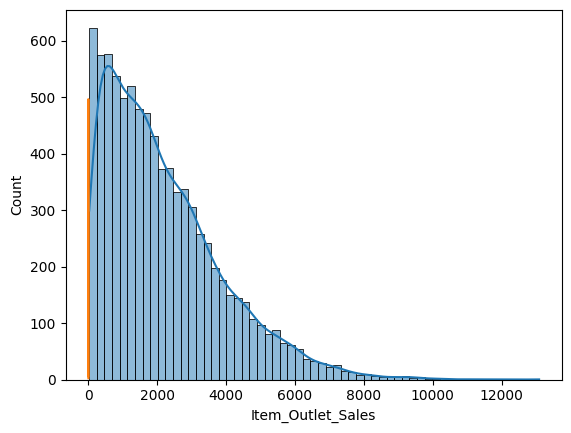

In [31]:
sns.histplot(data['Item_Outlet_Sales'], kde=True)

data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])

sns.histplot(data['Item_Outlet_Sales_Log'], kde=True)


### Importing necessary libraries for data manipulation, model training, and evaluation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

### Loading the Dataset

The dataset is loaded into a Pandas DataFrame from a CSV file using the `read_csv()` function.


In [ ]:
# loading the dataset
data = pd.read_csv('df_cleaned.csv')

In [9]:
data

,Fat_Low,Fat_Regular,Type_Baking,Type_Breads,Type_Breakfast,Type_Canned,Type_Dairy,Type_Frozen,Type_Fruits,Type_HardDrinks,...,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.826565,-0.971109,1.800763,0.139541,1.122235,-0.139541,0.831138,0.970675,1.747351,0.910548
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.621276,-0.908784,-1.476024,1.334103,-1.074526,-1.334103,1.630714,0.908058,1.488936,1.018381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.101430,-0.957359,0.041710,0.139541,0.029187,-0.139541,1.108662,0.956861,0.010040,0.049235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.501136,-1.280664,0.699815,0.020085,-0.881687,-0.020085,1.510816,1.281683,0.660011,0.849053
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913560,-1.280664,-1.385102,-1.293934,-0.706622,1.293934,0.918665,1.281683,1.399138,0.695332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.399086,-0.185302,1.227034,-1.293934,0.483735,1.293934,1.407164,0.181183,1.180714,0.349894
8322,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.042877,-0.374364,-0.502324,0.497909,-1.003877,-0.497909,1.048774,0.371132,0.527270,0.956346
8323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.520908,-0.601914,-0.876838,0.736822,-0.574212,-0.736822,0.523609,0.599749,0.897155,0.579066
8324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.317969,1.520668,-0.584005,1.334103,-0.138770,-1.334103,1.325550,1.532790,0.607941,0.196713


### Correlation Matrix

The correlation matrix below shows the relationships between various features in the dataset. This matrix helps identify pairs of features with strong positive or negative correlations, which may impact feature selection and model performance. Darker shades indicate stronger correlations, with positive correlations in red and negative correlations in blue.

- **High positive correlations** (closer to 1) indicate that as one feature increases, the other also increases.
- **High negative correlations** (closer to -1) suggest that as one feature increases, the other decreases.

This information can help in identifying multicollinearity, understanding feature importance, or even simplifying the model by removing redundant features.


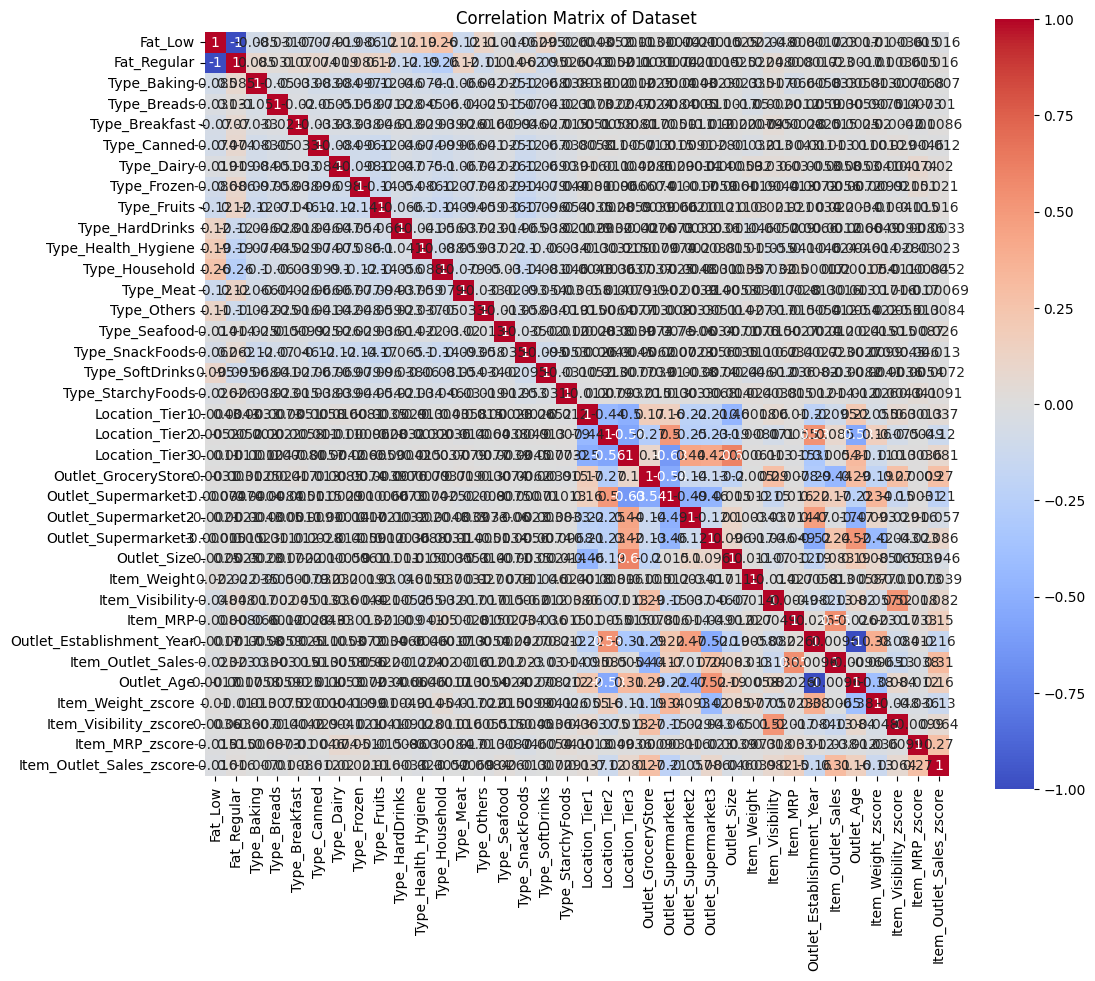

In [11]:
# Generate and visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix of Dataset")
plt.show()


### Separating Features and Target Variable, and Splitting the Dataset

1. **Separating Features (X) and Target Variable (y)**:
   - The features (input variables) are stored in `X`, and the target variable (the variable to predict) is stored in `y`.
   - The `Item_Outlet_Sales` column is dropped from the dataset to form the feature set (`X`), while it is extracted as the target variable (`y`).
   
   ```python
   X = data.drop('Item_Outlet_Sales', axis=1)  # Features
   y = data['Item_Outlet_Sales']  # Target


In [13]:
# Separating features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)  # Features
y = data['Item_Outlet_Sales']  # Target

# Splitting the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Determining Feature Importance with RandomForestRegressor
In this cell, we use a `RandomForestRegressor` to identify the most important features in our dataset. By selecting only the top features, we aim to simplify the model and improve its performance.

- **RandomForestRegressor for Feature Importance**:
  - A `RandomForestRegressor` with 100 trees (`n_estimators=100`) is trained on the training data.
  - Feature importance scores, which indicate how influential each feature is in predicting the target variable, are extracted after fitting the model.

- **Selecting Top Features**:
  - The feature importance scores are stored as a pandas Series, with feature names as the index.
  - The `nlargest(10)` function is used to select the top 10 most important features, which are then stored in `top_features`.
  - We filter the original feature set (`X`) to retain only these top 10 features, resulting in `X_top`.
  - The training and test sets are updated to include only the selected top features.

After this step, the dataset is reduced to the most significant features, helping the model to potentially perform better by focusing on key predictors.


In [15]:
# Using RandomForestRegressor to determine feature importance
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(x_train, y_train)

# Selecting the top 10 important features based on feature importance scores
feature_importances = pd.Series(feature_selector.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10).index
X_top = X[top_features]

x_train, x_test = x_train[top_features], x_test[top_features]

### Defining and Evaluating Multiple Regression Models
In this section, we define and evaluate a variety of regression models to determine which performs best on the dataset. We employ a repeated train-test split approach to assess the models' stability and performance.

- **Model Definitions**:
  - A dictionary called `models` is created with several regression models, including:
    - **Linear Regression**: A basic linear model.
    - **Polynomial Regression**: A pipeline combining polynomial features (degree=2) with linear regression.
    - **Decision Tree and Random Forest**: Tree-based models for capturing non-linear relationships.
    - **Support Vector Regression**: A pipeline scaling data for support vector regression with a linear kernel.
    - **K-Nearest Neighbors (KNN) Regression**: A neighborhood-based approach with 5 neighbors.
    - **XGBoost Regression**: A gradient boosting model with 100 estimators, a learning rate of 0.1, and a maximum depth of 3.

- **Repeated Evaluation for Stability**:
  - We repeat the train-test split and model evaluation 10 times (`n_runs=10`), each time using a different random state to ensure the R² score results are stable.
  - For each model and split, we fit the model to the training data, predict on the test data, and calculate the R² score, storing these scores in `test_r2_scores`.

- **Results Calculation and Display**:
  - The mean and standard deviation of the test R² scores are calculated for each model to summarize performance.
  - Results are stored in the `results` dictionary and displayed with the mean and standard deviation of the R² scores for each model.

This approach provides a robust comparison of models by assessing both the average performance and variability across multiple train-test splits.


In [17]:
# Defining multiple regression models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Decision Tree": DecisionTreeRegressor(random_state=2),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": make_pipeline(StandardScaler(), SVR(kernel='linear')),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regression": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, verbosity=0),
}

# Setting up to perform repeated train-test splits for model stability
n_runs = 10
results = {}

# Loop for each model evaluation
for model_name, model in models.items():
    test_r2_scores = []
    
    # Repeating train-test split for stability in R² scores
    for i in range(n_runs):
        x_train, x_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=i)
        
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
       
        test_r2 = r2_score(y_test, y_test_pred)
        test_r2_scores.append(test_r2)
    
    mean_r2 = np.mean(test_r2_scores)
    std_dev_r2 = np.std(test_r2_scores)
    
    results[model_name] = {
        "Mean Test R2": mean_r2,
        "Standard Deviation of Test R2": std_dev_r2
    }
    
    print(f"\n--- {model_name} ---")
    print(f"Mean Test R2: {results[model_name]['Mean Test R2']}")
    print(f"Standard Deviation of Test R2: {results[model_name]['Standard Deviation of Test R2']}")


--- Linear Regression ---
Mean Test R2: 0.666304958523068
Standard Deviation of Test R2: 0.019802294563189122

--- Polynomial Regression ---
Mean Test R2: 0.8018192443390226
Standard Deviation of Test R2: 0.01458749241262307

--- Decision Tree ---
Mean Test R2: 0.7033178802543654
Standard Deviation of Test R2: 0.02177397742980926

--- Random Forest ---
Mean Test R2: 0.8379686061761111
Standard Deviation of Test R2: 0.01458727656335505

--- Support Vector Regression ---
Mean Test R2: 0.6231257177883942
Standard Deviation of Test R2: 0.02623838776335696

--- KNN Regression ---
Mean Test R2: 0.7755617555608255
Standard Deviation of Test R2: 0.014741745650702942

--- XGBoost Regression ---
Mean Test R2: 0.8269563826030086
Standard Deviation of Test R2: 0.014558009261127911


### Identifying the Best Model Based on Mean R² Score
This cell identifies and displays the regression model with the highest average R² score across multiple train-test splits.

- **Finding the Best Model**:
  - Using the `max()` function with a lambda function as the key, we locate the model with the highest mean test R² score in the `results` dictionary.
  - The model name and instance are stored in `best_model_name` and `best_model`, respectively.

- **Displaying Results**:
  - The best model’s name, its mean test R² score, and the standard deviation of its R² scores are printed.
  - This output provides a summary of the top-performing model in terms of both predictive accuracy (mean R²) and stability (standard deviation of R²).

This final step highlights the model that performed best overall, which can guide further tuning or deployment.


In [19]:
# Finding the model with the highest mean R² score and printing it
best_model_name = max(results, key=lambda x: results[x]['Mean Test R2'])
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with Mean Test R2: {results[best_model_name]['Mean Test R2']} and Standard Deviation of Test R2: {results[best_model_name]['Standard Deviation of Test R2']}")


Best Model: Random Forest with Mean Test R2: 0.8379686061761111 and Standard Deviation of Test R2: 0.01458727656335505


### Hyperparameter Tuning for Random Forest and XGBoost Models
In this cell, we define parameter grids for hyperparameter tuning of the `RandomForestRegressor` and `XGBRegressor` models. Using `GridSearchCV`, we can systematically explore different combinations of parameters to identify the optimal settings for each model.

- **Random Forest Parameter Grid (`param_grid_rf`)**:
  - `n_estimators`: Number of trees in the forest (options: 50, 100, 200).
  - `max_depth`: Maximum depth of each tree (options: `None`, 10, 20, 30), where `None` allows trees to grow until all leaves are pure.
  - `min_samples_split`: Minimum samples required to split a node (options: 2, 5, 10).
  - `min_samples_leaf`: Minimum samples required to form a leaf node (options: 1, 2, 4).

- **XGBoost Parameter Grid (`param_grid_xgb`)**:
  - `n_estimators`: Number of boosting rounds (options: 100, 200, 300).
  - `max_depth`: Maximum depth of a tree (options: 3, 5, 7).
  - `learning_rate`: Shrinks the contribution of each tree (options: 0.01, 0.1, 0.2).
  - `subsample`: Fraction of samples used for training each tree (options: 0.8, 0.9, 1.0).

These grids will be used to evaluate different hyperparameter configurations through `GridSearchCV`, allowing us to fine-tune the models and potentially improve their performance.


In [21]:
# Setting up hyperparameter tuning for Random Forest and XGBoost using GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

### Initializing Random Forest and XGBoost Models
In this cell, we create instances of `RandomForestRegressor` and `XGBRegressor` with specified parameters. These models will be used for further training and hyperparameter tuning.

- **Random Forest (`rf_model`)**:
  - `random_state=42`: Setting a random state for reproducibility.
  - The `RandomForestRegressor` is an ensemble learning model that combines multiple decision trees to improve predictive accuracy.

- **XGBoost (`xgb_model`)**:
  - `objective='reg:squarederror'`: Specifies the objective function as squared error, suitable for regression tasks.
  - `random_state=42`: Ensures consistent results across runs.
  - `XGBRegressor` is a powerful gradient boosting model that builds sequential decision trees and optimizes them to minimize error.

These initialized models will be tuned and evaluated for optimal performance in predicting the target variable.


In [23]:
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

### Setting Up GridSearchCV for Hyperparameter Tuning
In this cell, we configure `GridSearchCV` to perform hyperparameter tuning on both `RandomForestRegressor` and `XGBRegressor`. `GridSearchCV` will evaluate different combinations of parameters based on the parameter grids defined earlier to find the optimal settings for each model.

- **GridSearchCV for Random Forest (`grid_search_rf`)**:
  - `estimator=rf_model`: Specifies the base `RandomForestRegressor` model to tune.
  - `param_grid=param_grid_rf`: Provides the parameter grid with various options for tuning.
  - `scoring='r2'`: Uses the R² score as the metric to evaluate model performance.
  - `cv=3`: Performs 3-fold cross-validation, splitting the data into 3 subsets to validate each parameter configuration.
  - `n_jobs=-1`: Utilizes all available CPU cores to speed up the search.

- **GridSearchCV for XGBoost (`grid_search_xgb`)**:
  - `estimator=xgb_model`: Specifies the base `XGBRegressor` model.
  - `param_grid=param_grid_xgb`: Uses the XGBoost-specific parameter grid for tuning.
  - Other parameters (`scoring`, `cv`, `n_jobs`) follow the same setup as the Random Forest model.

By running `GridSearchCV` on both models, we can systematically explore and identify the best hyperparameters for each, maximizing predictive accuracy.


In [25]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', cv=3, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='r2', cv=3, n_jobs=-1)

### Hyperparameter Tuning with GridSearchCV

To optimize the performance of our models, we are using `GridSearchCV` to search for the best hyperparameters for both Random Forest and XGBoost models.

1. **Random Forest Model**:
   - The `grid_search_rf.fit(x_train, y_train)` call performs a grid search to find the best combination of hyperparameters for the Random Forest model.
   - After fitting, the best model can be accessed using `best_rf_model = grid_search_rf.best_estimator_`, and the best parameters can be retrieved with `best_rf_params = grid_search_rf.best_params_`.

2. **XGBoost Model**:
   - Similarly, `grid_search_xgb.fit(x_train, y_train)` runs the grid search for the XGBoost model.
   - The best XGBoost model is then stored in `best_xgb_model = grid_search_xgb.best_estimator_`, and the best parameters in `best_xgb_params = grid_search_xgb.best_params_`.

This process helps to optimize the hyperparameters of both models for better predictive accuracy.


In [27]:
# Applying GridSearchCV for optimal hyperparameter tuning on Random Forest and XGBoost
grid_search_rf.fit(x_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

grid_search_xgb.fit(x_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_

### Model Prediction on Test Data

After obtaining the best models from the hyperparameter tuning process, we make predictions on the test dataset.

1. **Random Forest Predictions**:
   - Using the optimized Random Forest model, predictions are made on the test set with `y_pred_rf = best_rf_model.predict(x_test)`.
   - This gives the predicted values for the target variable based on the test features.

2. **XGBoost Predictions**:
   - Similarly, the best XGBoost model is used to make predictions on the test data: `y_pred_xgb = best_xgb_model.predict(x_test)`.
   - This provides the predicted values for the target variable using the test set.

These predictions can now be compared with the actual test values to evaluate model performance.


In [29]:
y_pred_rf = best_rf_model.predict(x_test)
y_pred_xgb = best_xgb_model.predict(x_test)

### Model Evaluation and Hyperparameter Display

After making predictions with both the Random Forest and XGBoost models, we evaluate their performance and print the best hyperparameters.

1. **Model Evaluation**:
   - For both models, we calculate two performance metrics:
     - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
     - **R² Score**: Indicates how well the model's predictions match the actual values, with higher values (closer to 1) indicating better performance.
   
   The evaluation results are printed for both models:
   ```python
   print(f"Random Forest Best Model - Mean Squared Error: {mse_rf}, R²: {r2_rf}")
   print(f"XGBoost Best Model - Mean Squared Error: {mse_xgb}, R²: {r2_xgb}")


In [31]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- Evaluation on Test Set ---")
print(f"Random Forest Best Model - Mean Squared Error: {mse_rf}, R²: {r2_rf}")
print(f"XGBoost Best Model - Mean Squared Error: {mse_xgb}, R²: {r2_xgb}")


# Printing the best hyperparameters for both models
print("\n--- Best Hyperparameters ---")
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")
print(f"Best Hyperparameters for XGBoost: {best_xgb_params}")


--- Evaluation on Test Set ---
Random Forest Best Model - Mean Squared Error: 0.16500727009331237, R²: 0.8351616683168234
XGBoost Best Model - Mean Squared Error: 0.16447032514050283, R²: 0.8356980635324813

--- Best Hyperparameters ---
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [32]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [48]:
best_rf_model = grid_search_rf.best_estimator_


In [49]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [50]:
# Predictions on the training set
y_train_pred_rf = best_rf_model.predict(x_train)
y_train_pred_xgb = best_xgb_model.predict(x_train)

# Training metrics
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)
r2_rf_train = r2_score(y_train, y_train_pred_rf)

mse_xgb_train = mean_squared_error(y_train, y_train_pred_xgb)
r2_xgb_train = r2_score(y_train, y_train_pred_xgb)

# Print the training metrics
print("\n--- Training Set Metrics ---")
print(f"Random Forest - MSE: {mse_rf_train}, R²: {r2_rf_train}")
print(f"XGBoost - MSE: {mse_xgb_train}, R²: {r2_xgb_train}")



--- Training Set Metrics ---
Random Forest - MSE: 0.10190870829958915, R²: 0.8980414553521485
XGBoost - MSE: 0.12396012474831691, R²: 0.8759792551138099
